<h2 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 25px !important;">1|</b><p style="color: #D5F0C1;font-size: 25px !important; display: inline-block;">Import Libraries</p>
</h2>

In [3]:
import torch
import torchvision
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets,transforms
import numpy as np
import os
import pandas as pd
from collections import Counter
import torch.nn as nn
import torch.nn.functional as F
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tqdm import tqdm
from tabulate import tabulate
from torchinfo import summary
%matplotlib inline

<h2 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 25px !important;">2|</b><p style="color: #D5F0C1;font-size: 25px !important; display: inline-block;">Data Preparation</p>
</h2>

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">2.1|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Load Data from Directories</p>
</h3>

In [4]:
dataset_path = {
             "train_path" : "/kaggle/input/indian-birds/Birds_25/train",
             "valid_path" : "/kaggle/input/indian-birds/Birds_25/valid",
          }

all_data = []

for path in dataset_path.values():
    data = {"img_path": [] , "label": [] }
    labels = os.listdir(path)

    for label in labels:
        folder_path = os.path.join(path, label)
        file_names = os.listdir(folder_path)
        for file_name in file_names:
            img_path = os.path.join(folder_path, file_name)
            data["img_path"].append(img_path)
            data["label"].append(label)
        
    all_data.append(data.copy())
    data.clear()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/indian-birds/Birds_25/train'

In [3]:
train_df = pd.DataFrame.from_dict(all_data[0])
valid_df = pd.DataFrame.from_dict(all_data[1])

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">2.2|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Encode Label</p>
</h3>

In [4]:
lbe = LabelEncoder()
train_df['encoded_label'] = lbe.fit_transform(train_df['label'])
valid_df['encoded_label'] = lbe.fit_transform(valid_df['label'])

list_class = dict(zip(lbe.classes_, lbe.transform(lbe.classes_)))
num_of_class = len(list_class)

In [5]:
train_df['label'].value_counts(normalize=False)

label
Common-Rosefinch             1200
House-Crow                   1200
Indian-Grey-Hornbill         1200
Indian-Pitta                 1200
Red-Wattled-Lapwing          1200
Ruddy-Shelduck               1200
Gray-Wagtail                 1200
White-Breasted-Kingfisher    1200
Indian-Peacock               1200
Cattle-Egret                 1200
Coppersmith-Barbet           1200
Hoopoe                       1200
Sarus-Crane                  1200
Asian-Green-Bee-Eater        1200
Common-Myna                  1200
Forest-Wagtail               1200
White-Breasted-Waterhen      1200
Rufous-Treepie               1200
Common-Tailorbird            1200
Brown-Headed-Barbet          1200
Indian-Roller                1200
White-Wagtail                1200
Jungle-Babbler               1200
Common-Kingfisher            1200
Northern-Lapwing             1200
Name: count, dtype: int64

In [6]:
valid_df['label'].value_counts(normalize=False)

label
Common-Rosefinch             300
House-Crow                   300
Indian-Grey-Hornbill         300
Indian-Pitta                 300
Red-Wattled-Lapwing          300
Ruddy-Shelduck               300
Gray-Wagtail                 300
White-Breasted-Kingfisher    300
Indian-Peacock               300
Cattle-Egret                 300
Coppersmith-Barbet           300
Hoopoe                       300
Sarus-Crane                  300
Asian-Green-Bee-Eater        300
Common-Myna                  300
Forest-Wagtail               300
White-Breasted-Waterhen      300
Rufous-Treepie               300
Common-Tailorbird            300
Brown-Headed-Barbet          300
Indian-Roller                300
White-Wagtail                300
Jungle-Babbler               300
Common-Kingfisher            300
Northern-Lapwing             300
Name: count, dtype: int64

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">2.3|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Combine All Data</p>
</h3>

In [7]:
df = pd.concat([train_df, valid_df], ignore_index=True)
df

,img_path,label,encoded_label
0,/kaggle/input/indian-birds/Birds_25/train/Comm...,Common-Rosefinch,5
1,/kaggle/input/indian-birds/Birds_25/train/Comm...,Common-Rosefinch,5
2,/kaggle/input/indian-birds/Birds_25/train/Comm...,Common-Rosefinch,5
3,/kaggle/input/indian-birds/Birds_25/train/Comm...,Common-Rosefinch,5
4,/kaggle/input/indian-birds/Birds_25/train/Comm...,Common-Rosefinch,5
...,...,...,...
37495,/kaggle/input/indian-birds/Birds_25/valid/Nort...,Northern-Lapwing,17
37496,/kaggle/input/indian-birds/Birds_25/valid/Nort...,Northern-Lapwing,17
37497,/kaggle/input/indian-birds/Birds_25/valid/Nort...,Northern-Lapwing,17
37498,/kaggle/input/indian-birds/Birds_25/valid/Nort...,Northern-Lapwing,17


In [8]:
df['label'].value_counts()

label
Common-Rosefinch             1500
House-Crow                   1500
Indian-Grey-Hornbill         1500
Indian-Pitta                 1500
Red-Wattled-Lapwing          1500
Ruddy-Shelduck               1500
Gray-Wagtail                 1500
White-Breasted-Kingfisher    1500
Indian-Peacock               1500
Cattle-Egret                 1500
Coppersmith-Barbet           1500
Hoopoe                       1500
Sarus-Crane                  1500
Asian-Green-Bee-Eater        1500
Common-Myna                  1500
Forest-Wagtail               1500
White-Breasted-Waterhen      1500
Rufous-Treepie               1500
Common-Tailorbird            1500
Brown-Headed-Barbet          1500
Indian-Roller                1500
White-Wagtail                1500
Jungle-Babbler               1500
Common-Kingfisher            1500
Northern-Lapwing             1500
Name: count, dtype: int64

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">2.4|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Split Data into Train, Valid & Test</p>
</h3>

In [9]:
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df, test_df = train_test_split(train_df, test_size=0.1, random_state=42, stratify=train_df['label'])

In [10]:
train_df

,img_path,label,encoded_label
29827,/kaggle/input/indian-birds/Birds_25/train/Nort...,Northern-Lapwing,17
15558,/kaggle/input/indian-birds/Birds_25/train/Saru...,Sarus-Crane,21
8333,/kaggle/input/indian-birds/Birds_25/train/Brow...,Brown-Headed-Barbet,1
36320,/kaggle/input/indian-birds/Birds_25/valid/Red-...,Red-Wattled-Lapwing,18
32198,/kaggle/input/indian-birds/Birds_25/valid/Comm...,Common-Tailorbird,6
...,...,...,...
16238,/kaggle/input/indian-birds/Birds_25/train/Hous...,House-Crow,11
37370,/kaggle/input/indian-birds/Birds_25/valid/Nort...,Northern-Lapwing,17
32707,/kaggle/input/indian-birds/Birds_25/valid/Whit...,White-Breasted-Waterhen,23
23590,/kaggle/input/indian-birds/Birds_25/train/Gray...,Gray-Wagtail,9


In [11]:
train_df['label'].value_counts()

label
Northern-Lapwing             1080
Indian-Grey-Hornbill         1080
Common-Rosefinch             1080
House-Crow                   1080
Coppersmith-Barbet           1080
Asian-Green-Bee-Eater        1080
Forest-Wagtail               1080
Common-Myna                  1080
White-Breasted-Kingfisher    1080
Indian-Roller                1080
Rufous-Treepie               1080
Hoopoe                       1080
Indian-Peacock               1080
Sarus-Crane                  1080
Indian-Pitta                 1080
White-Breasted-Waterhen      1080
Gray-Wagtail                 1080
White-Wagtail                1080
Ruddy-Shelduck               1080
Jungle-Babbler               1080
Common-Kingfisher            1080
Common-Tailorbird            1080
Red-Wattled-Lapwing          1080
Brown-Headed-Barbet          1080
Cattle-Egret                 1080
Name: count, dtype: int64

In [12]:
valid_df['label'].value_counts()

label
Indian-Roller                300
Hoopoe                       300
Common-Tailorbird            300
Indian-Pitta                 300
Asian-Green-Bee-Eater        300
Rufous-Treepie               300
Coppersmith-Barbet           300
Red-Wattled-Lapwing          300
White-Breasted-Waterhen      300
Forest-Wagtail               300
Common-Myna                  300
Brown-Headed-Barbet          300
House-Crow                   300
Gray-Wagtail                 300
Indian-Peacock               300
Ruddy-Shelduck               300
Indian-Grey-Hornbill         300
Jungle-Babbler               300
White-Wagtail                300
Sarus-Crane                  300
Common-Rosefinch             300
Cattle-Egret                 300
White-Breasted-Kingfisher    300
Common-Kingfisher            300
Northern-Lapwing             300
Name: count, dtype: int64

In [13]:
test_df['label'].value_counts()

label
Sarus-Crane                  120
Gray-Wagtail                 120
Northern-Lapwing             120
Cattle-Egret                 120
Rufous-Treepie               120
Forest-Wagtail               120
Ruddy-Shelduck               120
Asian-Green-Bee-Eater        120
Indian-Peacock               120
Common-Myna                  120
Common-Rosefinch             120
Coppersmith-Barbet           120
House-Crow                   120
Indian-Roller                120
Brown-Headed-Barbet          120
Indian-Pitta                 120
Red-Wattled-Lapwing          120
Jungle-Babbler               120
Common-Kingfisher            120
Hoopoe                       120
Common-Tailorbird            120
Indian-Grey-Hornbill         120
White-Wagtail                120
White-Breasted-Waterhen      120
White-Breasted-Kingfisher    120
Name: count, dtype: int64

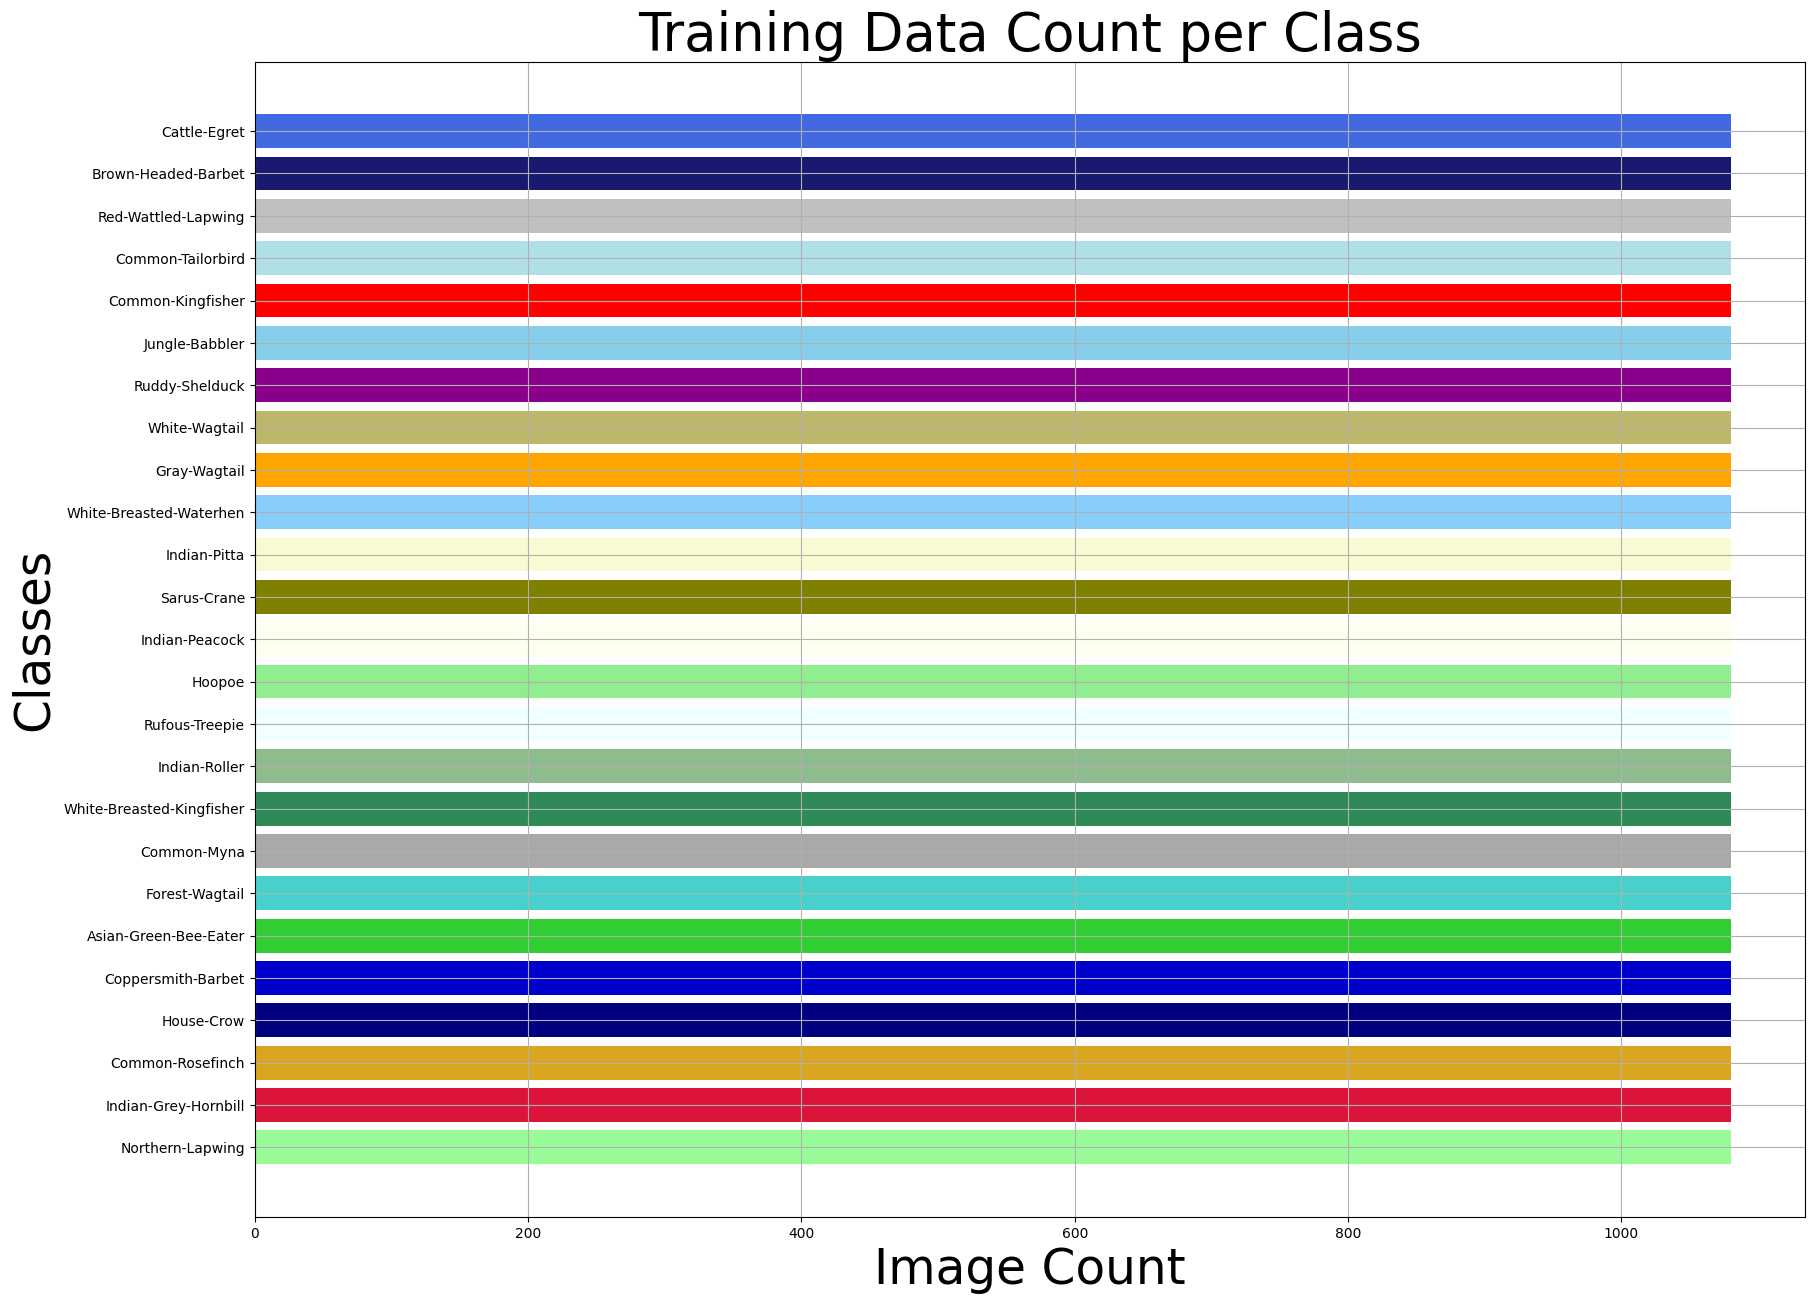

In [14]:
train  = train_df["label"].value_counts()
label = train.tolist()
index = train.index.tolist()

all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors, num_of_class)

plt.figure(figsize=(20,15))
plt.title("Training Data Count per Class",fontsize=38)
plt.xlabel('Image Count', fontsize=35)
plt.ylabel('Classes', fontsize=35)
plt.barh(index, label, color=colors)
plt.grid(True)
plt.show()

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">2.5|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Preview Data</p>
</h3>

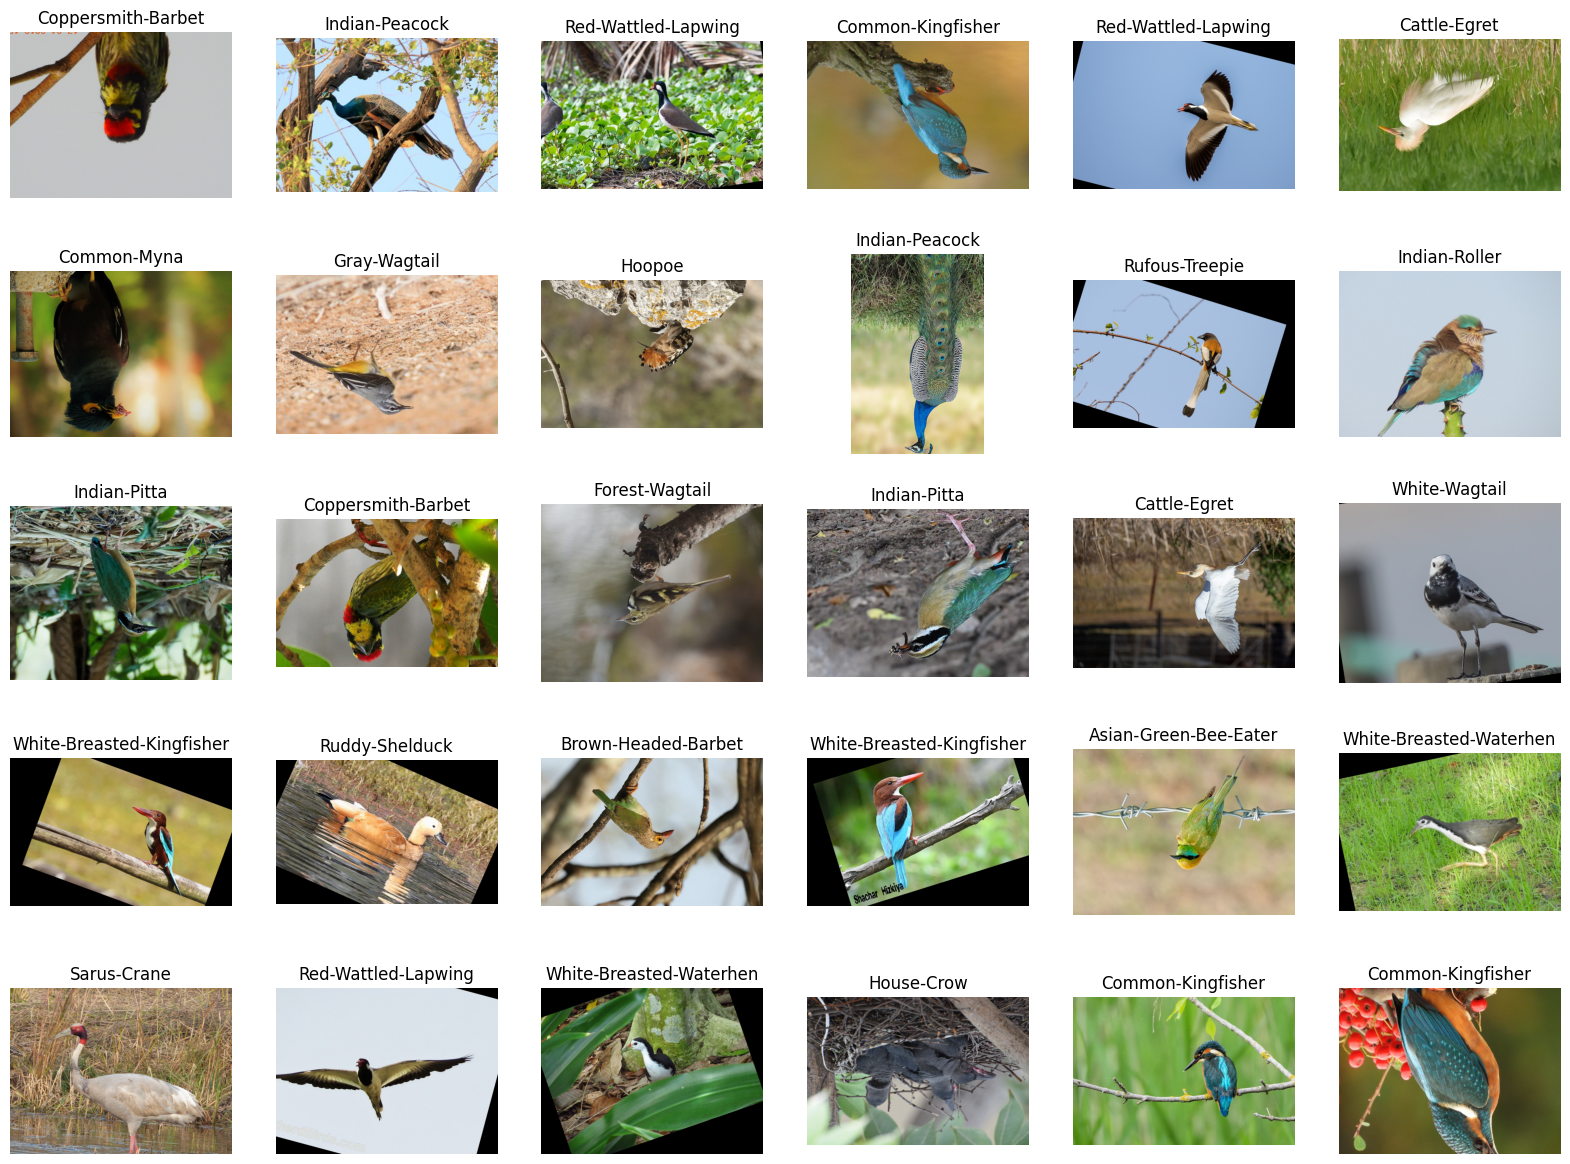

In [15]:
plt.figure(figsize=(20,15))
for i, row in valid_df.sample(n=30).reset_index().iterrows():
    plt.subplot(5,6,i+1)
    image_path = row['img_path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["label"])
    plt.axis('off')
    
plt.show()

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">2.6|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Load Data to Tensorflow format</p>
</h3>

In [16]:
%%time

batch_size = 32
img_height, img_width = 224, 224

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
#     rescale = 1./255
)

CPU times: user 32.1 ms, sys: 22.8 ms, total: 54.9 ms
Wall time: 91.1 ms


In [17]:
def load_data(df):
    return generator.flow_from_dataframe(
        dataframe=df,
        x_col='img_path',
        y_col='label',
        target_size=(img_height, img_width),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False,
        seed=42,
    )

# Split the data into three categories.
train_images = load_data(train_df)
val_images = load_data(valid_df)
test_images = load_data(test_df)

Found 27000 validated image filenames belonging to 25 classes.
Found 7500 validated image filenames belonging to 25 classes.
Found 3000 validated image filenames belonging to 25 classes.


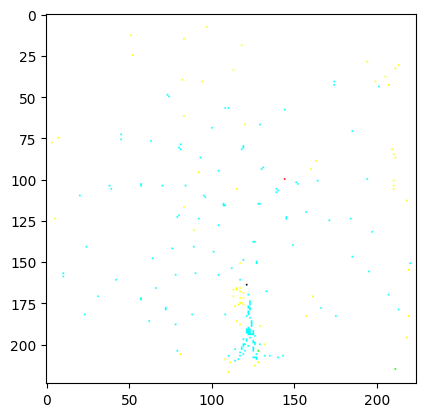

In [18]:
test_img, test_labels = next(test_images)
plt.imshow(test_img[23])

In [19]:
train_images[i][1][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

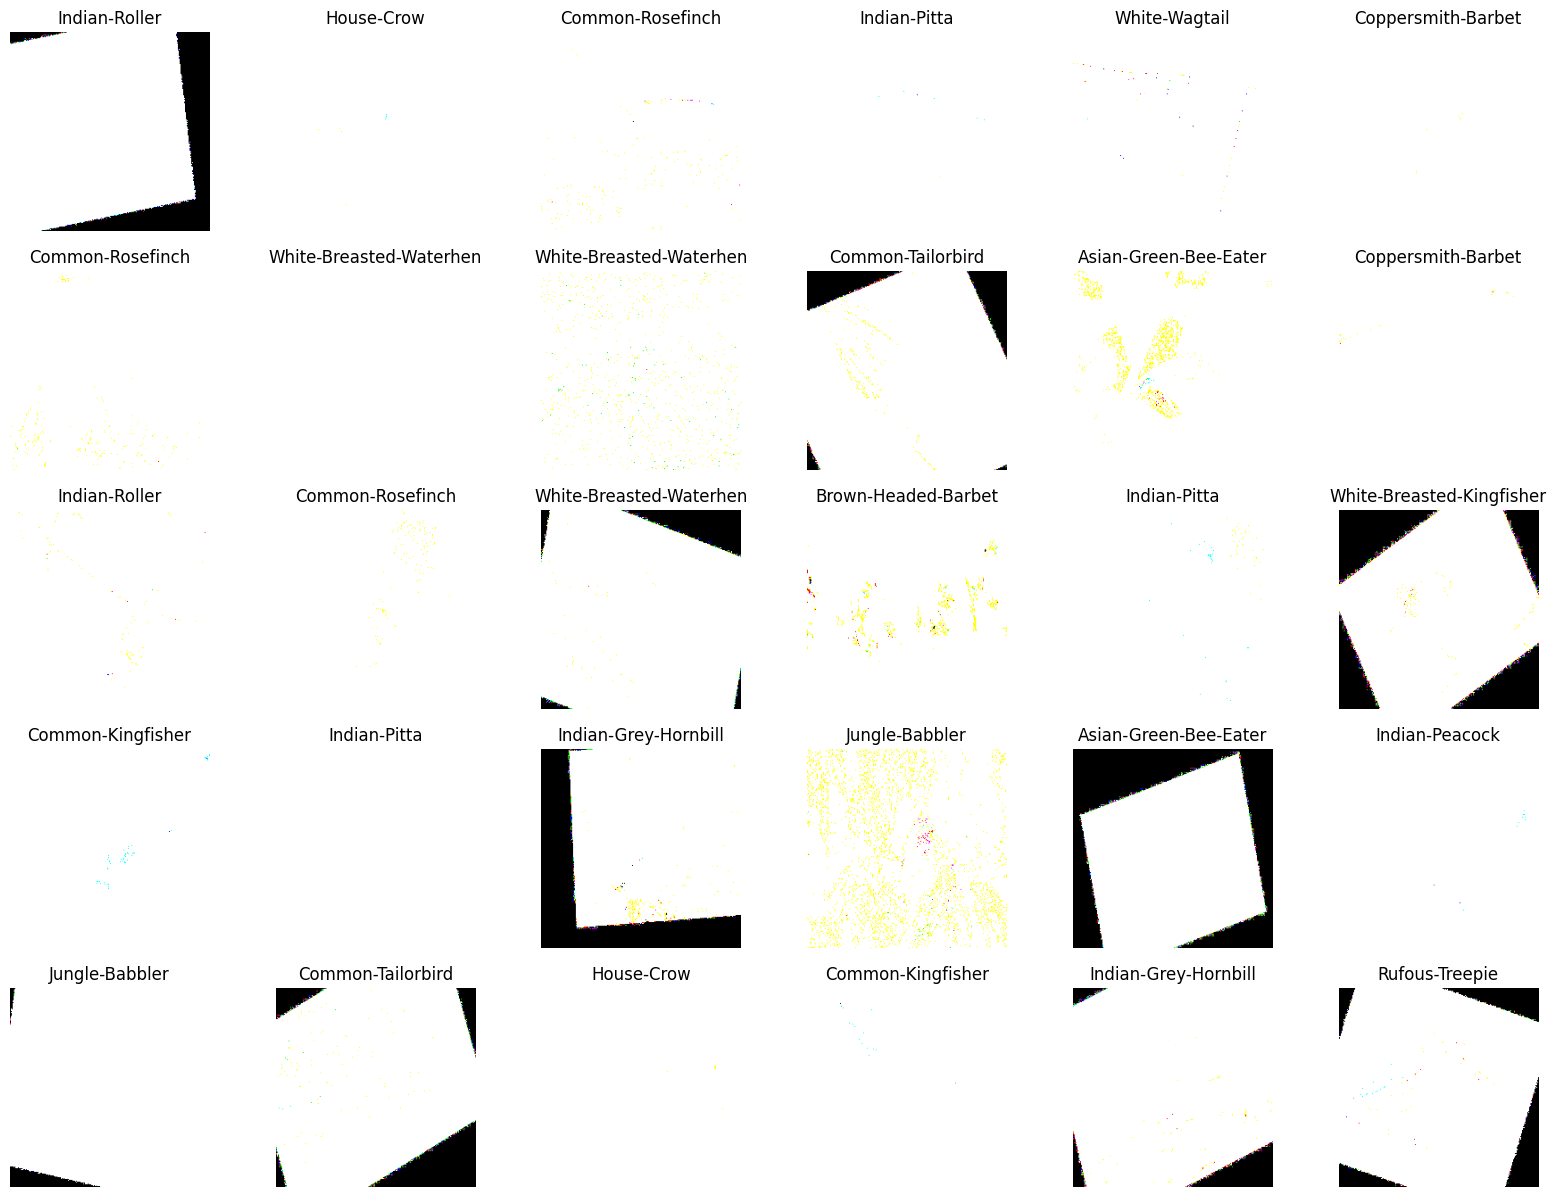

In [20]:
plt.figure(figsize=(20,15))
for i, row in valid_df.sample(n=30).reset_index().iterrows():
    plt.subplot(5,6,i+1)
    plt.imshow(train_images[i][0][0])
    plt.title(row["label"])
    plt.axis('off')
    
plt.show()

<h2 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 25px !important;">3|</b><p style="color: #D5F0C1;font-size: 25px !important; display: inline-block;">Model Preparation</p>
</h2>

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">3.1|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Load Pretrained Model</p>
</h3>

In [21]:
%%time

# Load the pretained model
effnet = tf.keras.applications.EfficientNetB3(include_top=False, weights='imagenet')

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(effnet.layers):
    effnet.layers[i].trainable = False

43941136/43941136 [==============================] - 0s 0us/step
CPU times: user 3.81 s, sys: 488 ms, total: 4.3 s
Wall time: 4.91 s


<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">3.2|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Metrics</p>
</h3>

In [22]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">3.3|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Add New Layers to Pretrained Model</p>
</h3>

In [23]:
# augmentation layers
augmentation = tf.keras.Sequential([                                    
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
], name='augmentation_layers')

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(img_height, img_width, 3)))
model.add(augmentation)
model.add(effnet)
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling2D())
model.add(tf.keras.layers.Dense(num_of_class, activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', f1, precision, recall]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 augmentation_layers (Seque  (None, 224, 224, 3)       0         
 ntial)                                                          
                                                                 
 efficientnetb3 (Functional  (None, None, None, 1536   10783535  
 )                           )                                   
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 1536)        0         
 D)                                                              
                                                                 
 dense (Dense)               (None, 3, 3, 256)         393472    
                                                                 
 global_max_pooling2d (Glob  (None, 256)               0         
 alMaxPooling2D)                                        

In [24]:
# tf.keras.utils.plot_model(model, show_shapes=True)

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">3.4|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Callback Functions</p>
</h3>

In [25]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                        patience=3,
                                        verbose=1,
                                        factor=0.2,
                                        min_lr=0.000003)

es = tf.keras.callbacks.EarlyStopping(monitor= 'val_acc',
                                      patience= 4 , 
                                      restore_best_weights= True, 
                                      verbose=1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./saved_model/best_weights.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks = [learning_rate_reduction, es, model_checkpoint]

In [26]:
history_tl = model.fit(train_images,
                    steps_per_epoch=len(train_images),
                    validation_data=val_images,
                    validation_steps=len(val_images),
                    epochs=8,
                    verbose=1,
                    callbacks=[callbacks]
                   )

model.save_weights('./saved_model/my_checkpoint_tflr')
model.save('./saved_model/final_model_transfer_learning.keras')

Epoch 1/8


2024-01-13 03:51:06.024690: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


844/844 [==============================] - ETA: 0s - loss: 0.5752 - accuracy: 0.8395 - f1: 0.8447 - precision: 0.8855 - recall: 0.8108
Epoch 1: val_accuracy improved from -inf to 0.93533, saving model to ./saved_model/best_weights.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


844/844 [==============================] - 468s 539ms/step - loss: 0.5752 - accuracy: 0.8395 - f1: 0.8447 - precision: 0.8855 - recall: 0.8108 - val_loss: 0.2123 - val_accuracy: 0.9353 - val_f1: 0.9381 - val_precision: 0.9479 - val_recall: 0.9287 - lr: 0.0010
Epoch 2/8
844/844 [==============================] - ETA: 0s - loss: 0.3018 - accuracy: 0.9090 - f1: 0.9124 - precision: 0.9313 - recall: 0.8948
Epoch 2: val_accuracy improved from 0.93533 to 0.94760, saving model to ./saved_model/best_weights.h5
844/844 [==============================] - 226s 268ms/step - loss: 0.3018 - accuracy: 0.9090 - f1: 0.9124 - precision: 0.9313 - recall: 0.8948 - val_loss: 0.1746 - val_accuracy: 0.9476 - val_f1: 0.9491 - val_precision: 0.9562 - val_recall: 0.9422 - lr: 0.0010
Epoch 3/8
844/844 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.9204 - f1: 0.9236 - precision: 0.9383 - recall: 0.9097
Epoch 3: val_accuracy did not improve from 0.94760
844/844 [============================

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 25px !important;">4|</b><p style="color: #D5F0C1;font-size: 25px !important; display: inline-block;">Evaluate Model</p>
</h3>

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">4.1|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Draw Model Training Graph</p>
</h3>

In [27]:
import matplotlib.pyplot as plt

# draw accuracy & lost graph
def train_plot(history):

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    acc_plot, = plt.plot(epochs, acc, 'r')
    val_acc_plot, = plt.plot(epochs, val_acc, 'b')
    plt.title('Training and Validation Accuracy')
    plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

    # Loss plot
    plt.subplot(1, 2, 2)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    loss_plot, = plt.plot(epochs, loss, 'r')
    val_loss_plot, = plt.plot(epochs, val_loss, 'b')
    plt.title('Training and Validation Loss')
    plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

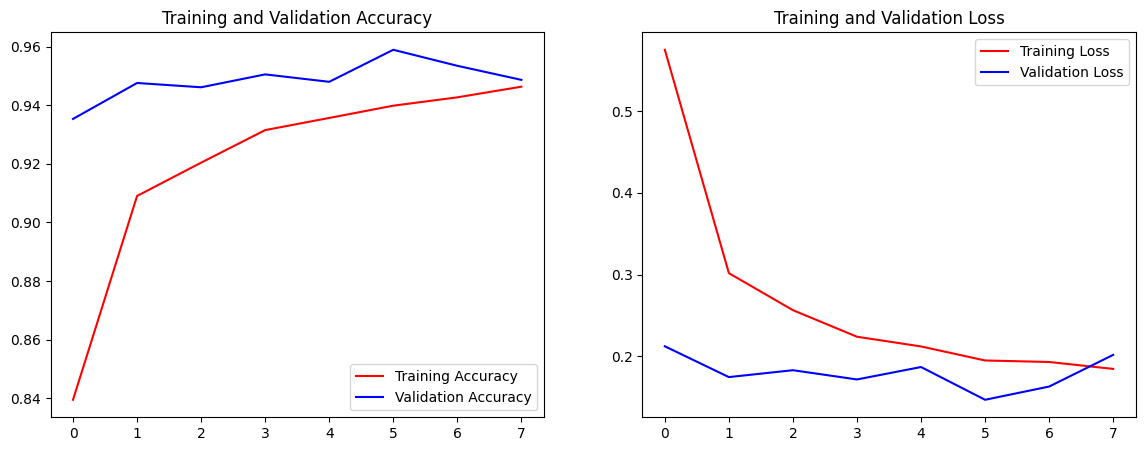

In [28]:
train_plot(history_tl)

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">4.2|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Draw Confusion Matrix & Calculate Model Metrics</p>
</h3>

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Class-label mapping obtained from `BBC Document Classification Part 1` kernel.

def evaluate(model):

    pred = model.predict(test_images)
    y_pred = np.argmax(pred, axis=1)
    y_true = test_images.classes
    
    c_mat = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(30, 30))
    hm = sns.heatmap(
        c_mat,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        cbar=False,
        linecolor="white",
        linewidths=1,
        xticklabels=test_images.class_indices.keys(),
        yticklabels=test_images.class_indices.keys(),
    )
    
    hm.tick_params(axis='x', labelrotation=45)
    
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    
    print(f"\nAccuracy: {accuracy_score(y_true, y_pred)}")
    print("\nClassification Report\n")
    print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))
    
    classes = dict(zip(test_images.class_indices.values(), test_images.class_indices.keys()))
    pred_df = pd.DataFrame({"Image Index" : list(range(len(test_images.labels))), 
                            "Test Labels" : test_images.labels, 
                            "Test Classes" : [classes[i] for i in test_images.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_images.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_images), axis = 1))]
                               })
    print(pred_df.head(8))

94/94 [==============================] - 46s 462ms/step

Accuracy: 0.9516666666666667

Classification Report

                           precision    recall  f1-score   support

    Asian-Green-Bee-Eater       0.98      0.99      0.98       120
      Brown-Headed-Barbet       0.94      0.95      0.95       120
             Cattle-Egret       0.99      0.97      0.98       120
        Common-Kingfisher       0.96      0.93      0.94       120
              Common-Myna       0.99      0.88      0.93       120
         Common-Rosefinch       0.90      0.95      0.93       120
        Common-Tailorbird       0.84      0.97      0.90       120
       Coppersmith-Barbet       0.98      0.93      0.95       120
           Forest-Wagtail       0.91      0.98      0.95       120
             Gray-Wagtail       0.91      0.97      0.94       120
                   Hoopoe       0.94      0.98      0.96       120
               House-Crow       0.96      0.92      0.94       120
     Indian-Grey-H

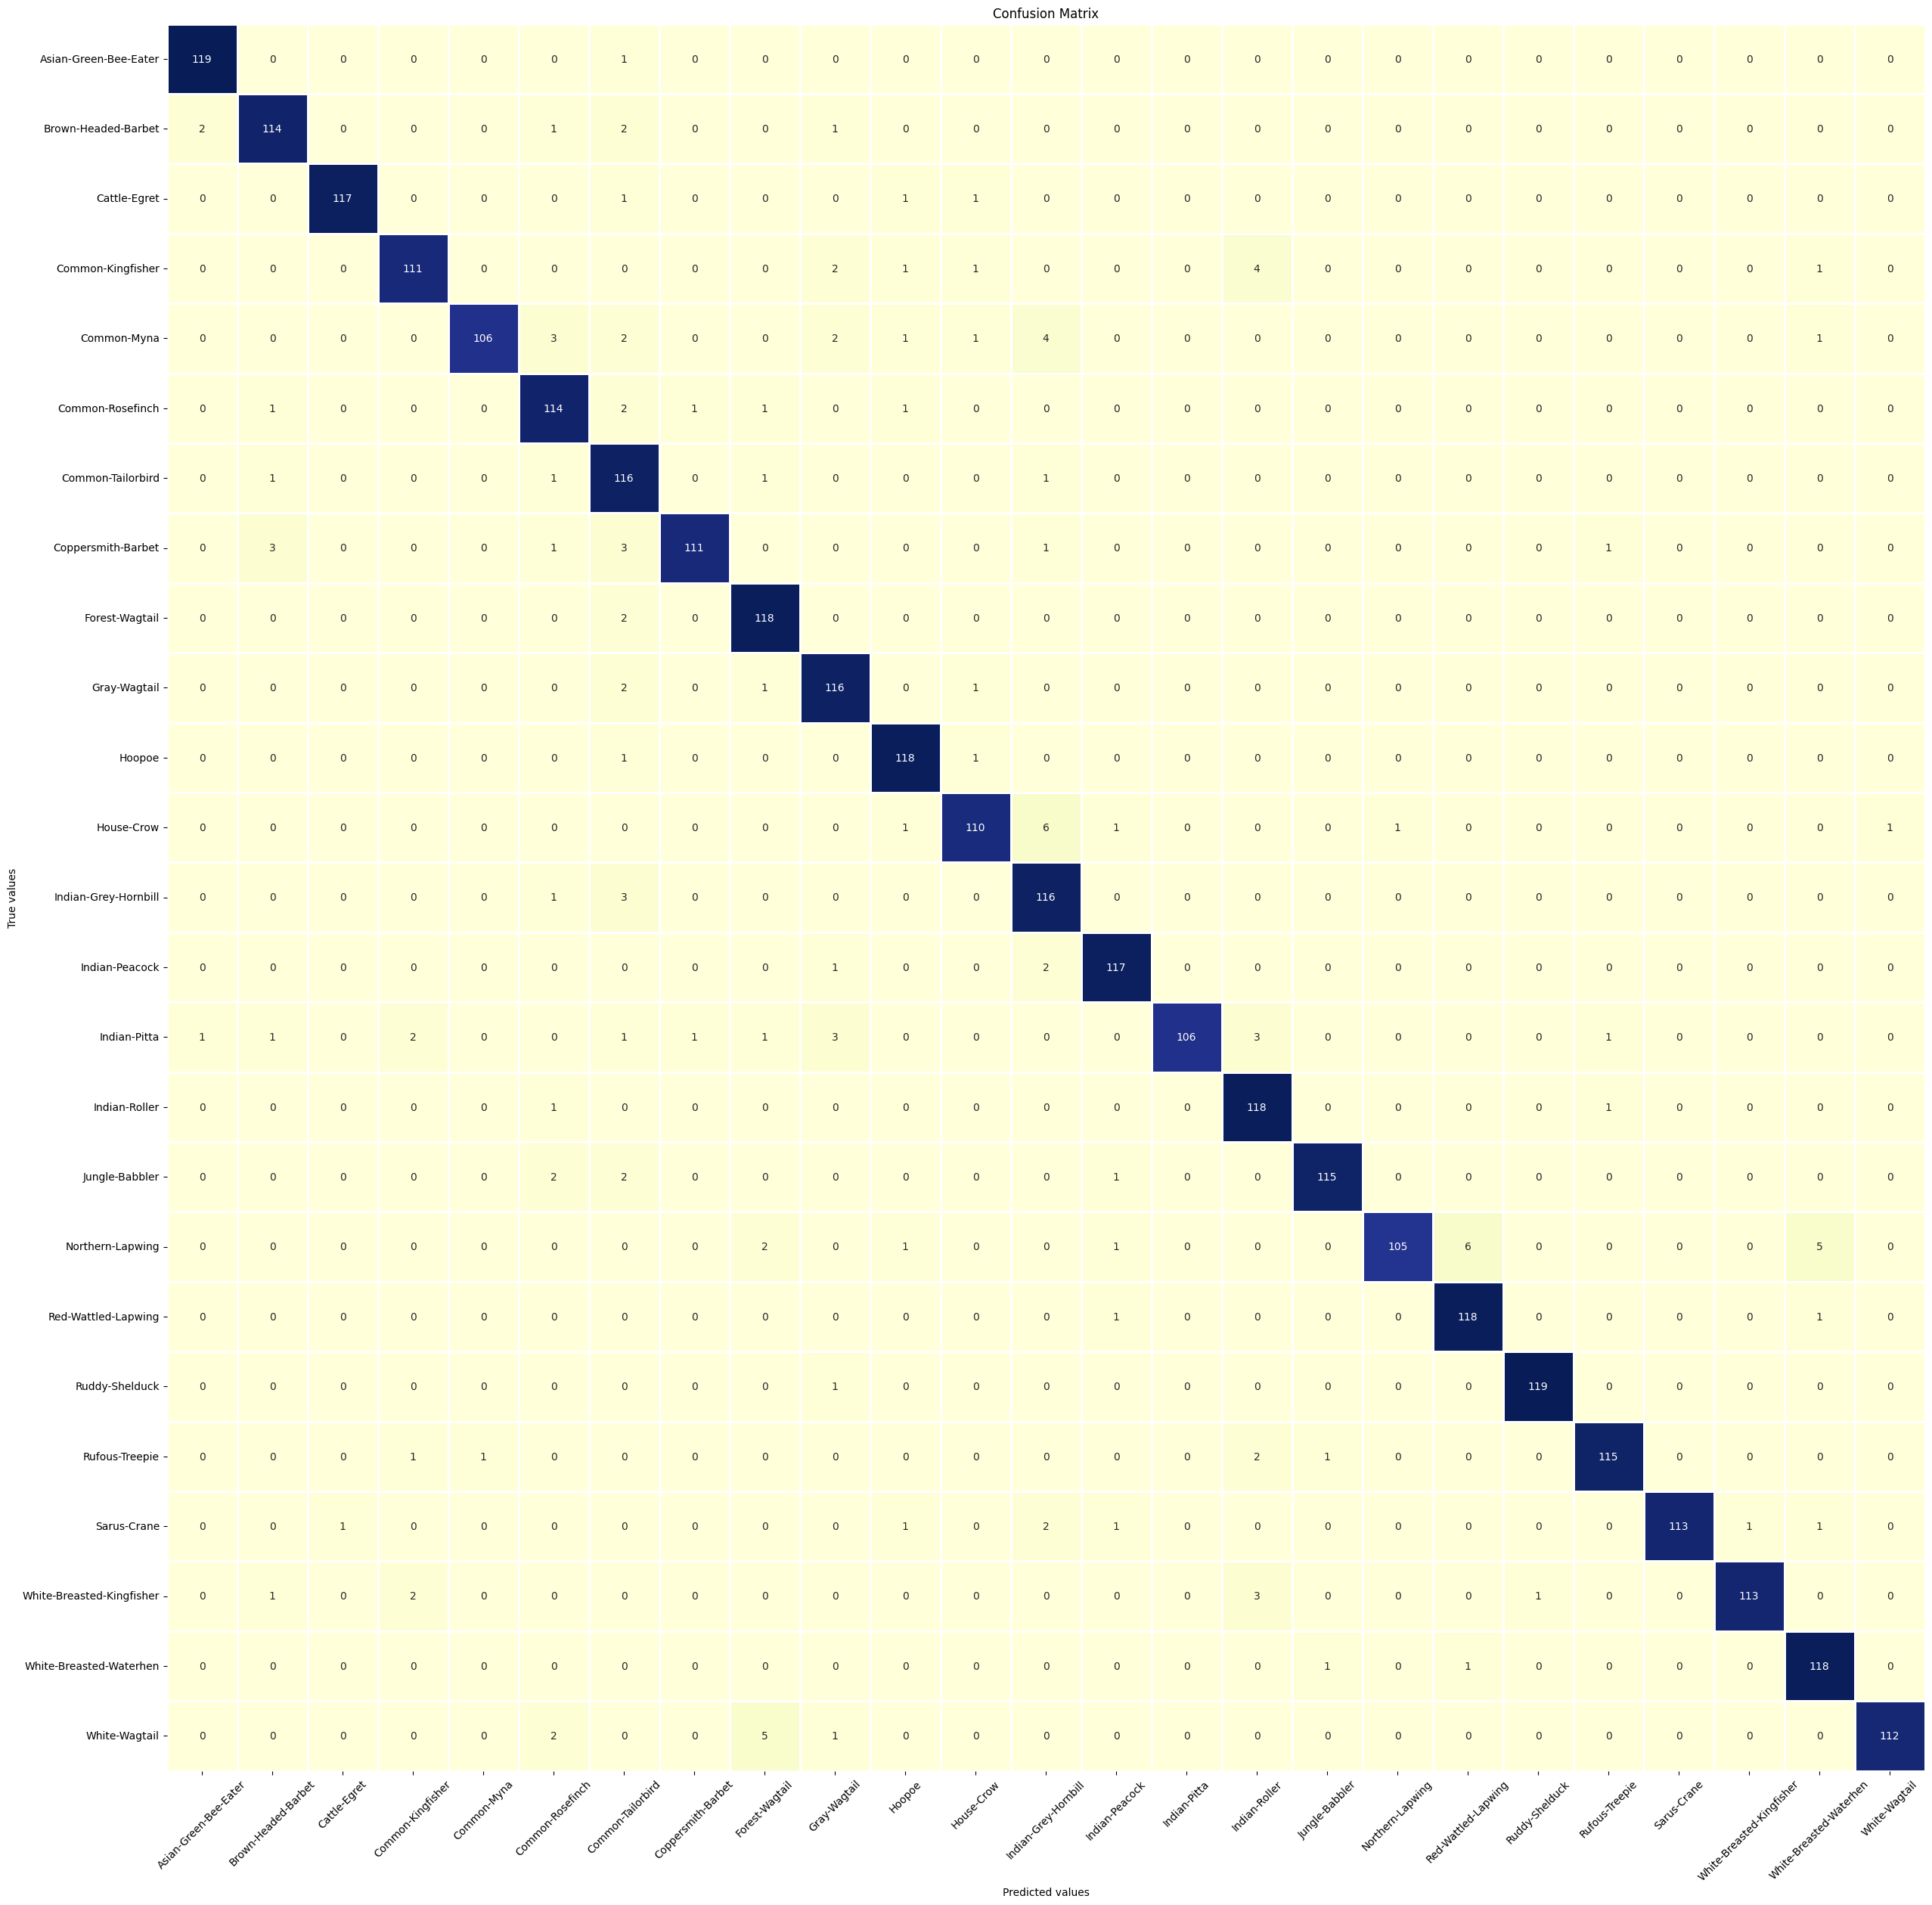

In [30]:
evaluate(model)

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 25px !important;">5|</b><p style="color: #D5F0C1;font-size: 25px !important; display: inline-block;">Save Model to tflite format</p>
</h3>

In [31]:
# Convert model to tf
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path(export_dir + 'birdies_transfer_learning.tflite')
tflite_model_file.write_bytes(tflite_model)

44361212

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 25px !important;">6|</b><p style="color: #D5F0C1;font-size: 25px !important; display: inline-block;">Fine Tune Training</p>
</h3>

In [32]:
%%time

# Load the pretained model
effnet.trainable = True

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(effnet.layers):
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy', f1, precision, recall]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 augmentation_layers (Seque  (None, None, None, None   0         
 ntial)                      )                                   
                                                                 
 efficientnetb3 (Functional  (None, None, None, 1536   10783535  
 )                           )                                   
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 1536)        0         
 D)                                                              
                                                                 
 dense (Dense)               (None, 3, 3, 256)         393472    
                                                                 
 global_max_pooling2d (Glob  (None, 256)               0         
 alMaxPooling2D)                                        

In [33]:
history_ft = model.fit(train_images,
                    steps_per_epoch=len(train_images),
                    validation_data=val_images,
                    validation_steps=len(val_images),
                    epochs=10,
                    verbose=1,
                    callbacks=[callbacks]
                   )

model.save_weights('./saved_model/my_checkpoint_ft')
model.save('./saved_model/final_model_fine_tuned.keras')

Epoch 1/10


2024-01-13 04:28:34.164498: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


844/844 [==============================] - ETA: 0s - loss: 0.0930 - accuracy: 0.9706 - f1: 0.9711 - precision: 0.9748 - recall: 0.9675
Epoch 1: val_accuracy improved from 0.95893 to 0.97853, saving model to ./saved_model/best_weights.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


844/844 [==============================] - 397s 423ms/step - loss: 0.0930 - accuracy: 0.9706 - f1: 0.9711 - precision: 0.9748 - recall: 0.9675 - val_loss: 0.0812 - val_accuracy: 0.9785 - val_f1: 0.9785 - val_precision: 0.9799 - val_recall: 0.9770 - lr: 5.0000e-05
Epoch 2/10
844/844 [==============================] - ETA: 0s - loss: 0.0507 - accuracy: 0.9836 - f1: 0.9839 - precision: 0.9864 - recall: 0.9816
Epoch 2: val_accuracy did not improve from 0.97853
844/844 [==============================] - 357s 423ms/step - loss: 0.0507 - accuracy: 0.9836 - f1: 0.9839 - precision: 0.9864 - recall: 0.9816 - val_loss: 0.0895 - val_accuracy: 0.9765 - val_f1: 0.9766 - val_precision: 0.9792 - val_recall: 0.9741 - lr: 5.0000e-05
Epoch 3/10
844/844 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9860 - f1: 0.9861 - precision: 0.9879 - recall: 0.9844
Epoch 3: val_accuracy improved from 0.97853 to 0.98213, saving model to ./saved_model/best_weights.h5
844/844 [==================

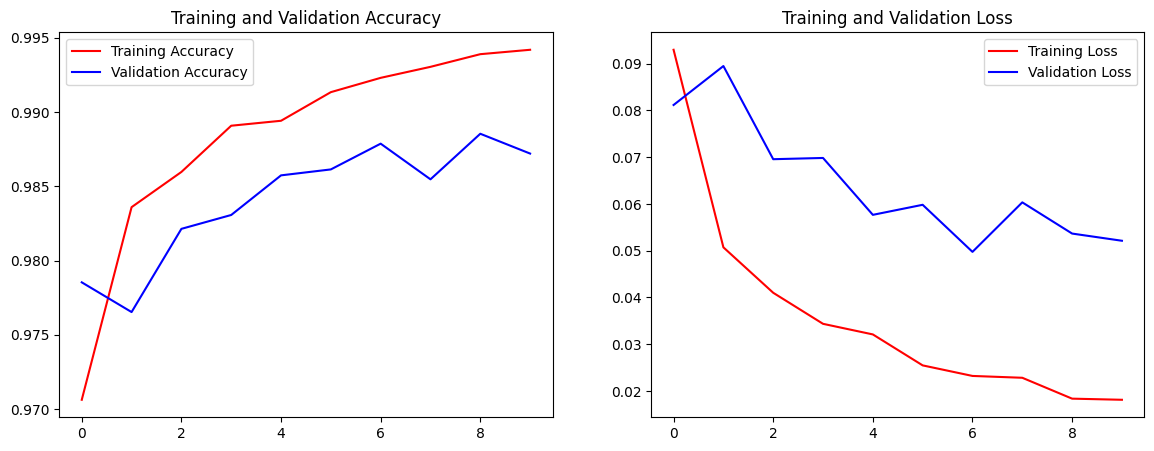

In [34]:
train_plot(history_ft)

94/94 [==============================] - 25s 241ms/step

Accuracy: 0.983

Classification Report

                           precision    recall  f1-score   support

    Asian-Green-Bee-Eater       0.99      1.00      1.00       120
      Brown-Headed-Barbet       0.98      0.98      0.98       120
             Cattle-Egret       0.99      0.99      0.99       120
        Common-Kingfisher       1.00      0.99      1.00       120
              Common-Myna       0.98      0.97      0.97       120
         Common-Rosefinch       0.97      0.97      0.97       120
        Common-Tailorbird       0.97      0.99      0.98       120
       Coppersmith-Barbet       0.95      1.00      0.98       120
           Forest-Wagtail       0.98      0.99      0.99       120
             Gray-Wagtail       0.98      0.97      0.98       120
                   Hoopoe       0.96      0.98      0.97       120
               House-Crow       1.00      0.92      0.96       120
     Indian-Grey-Hornbill      

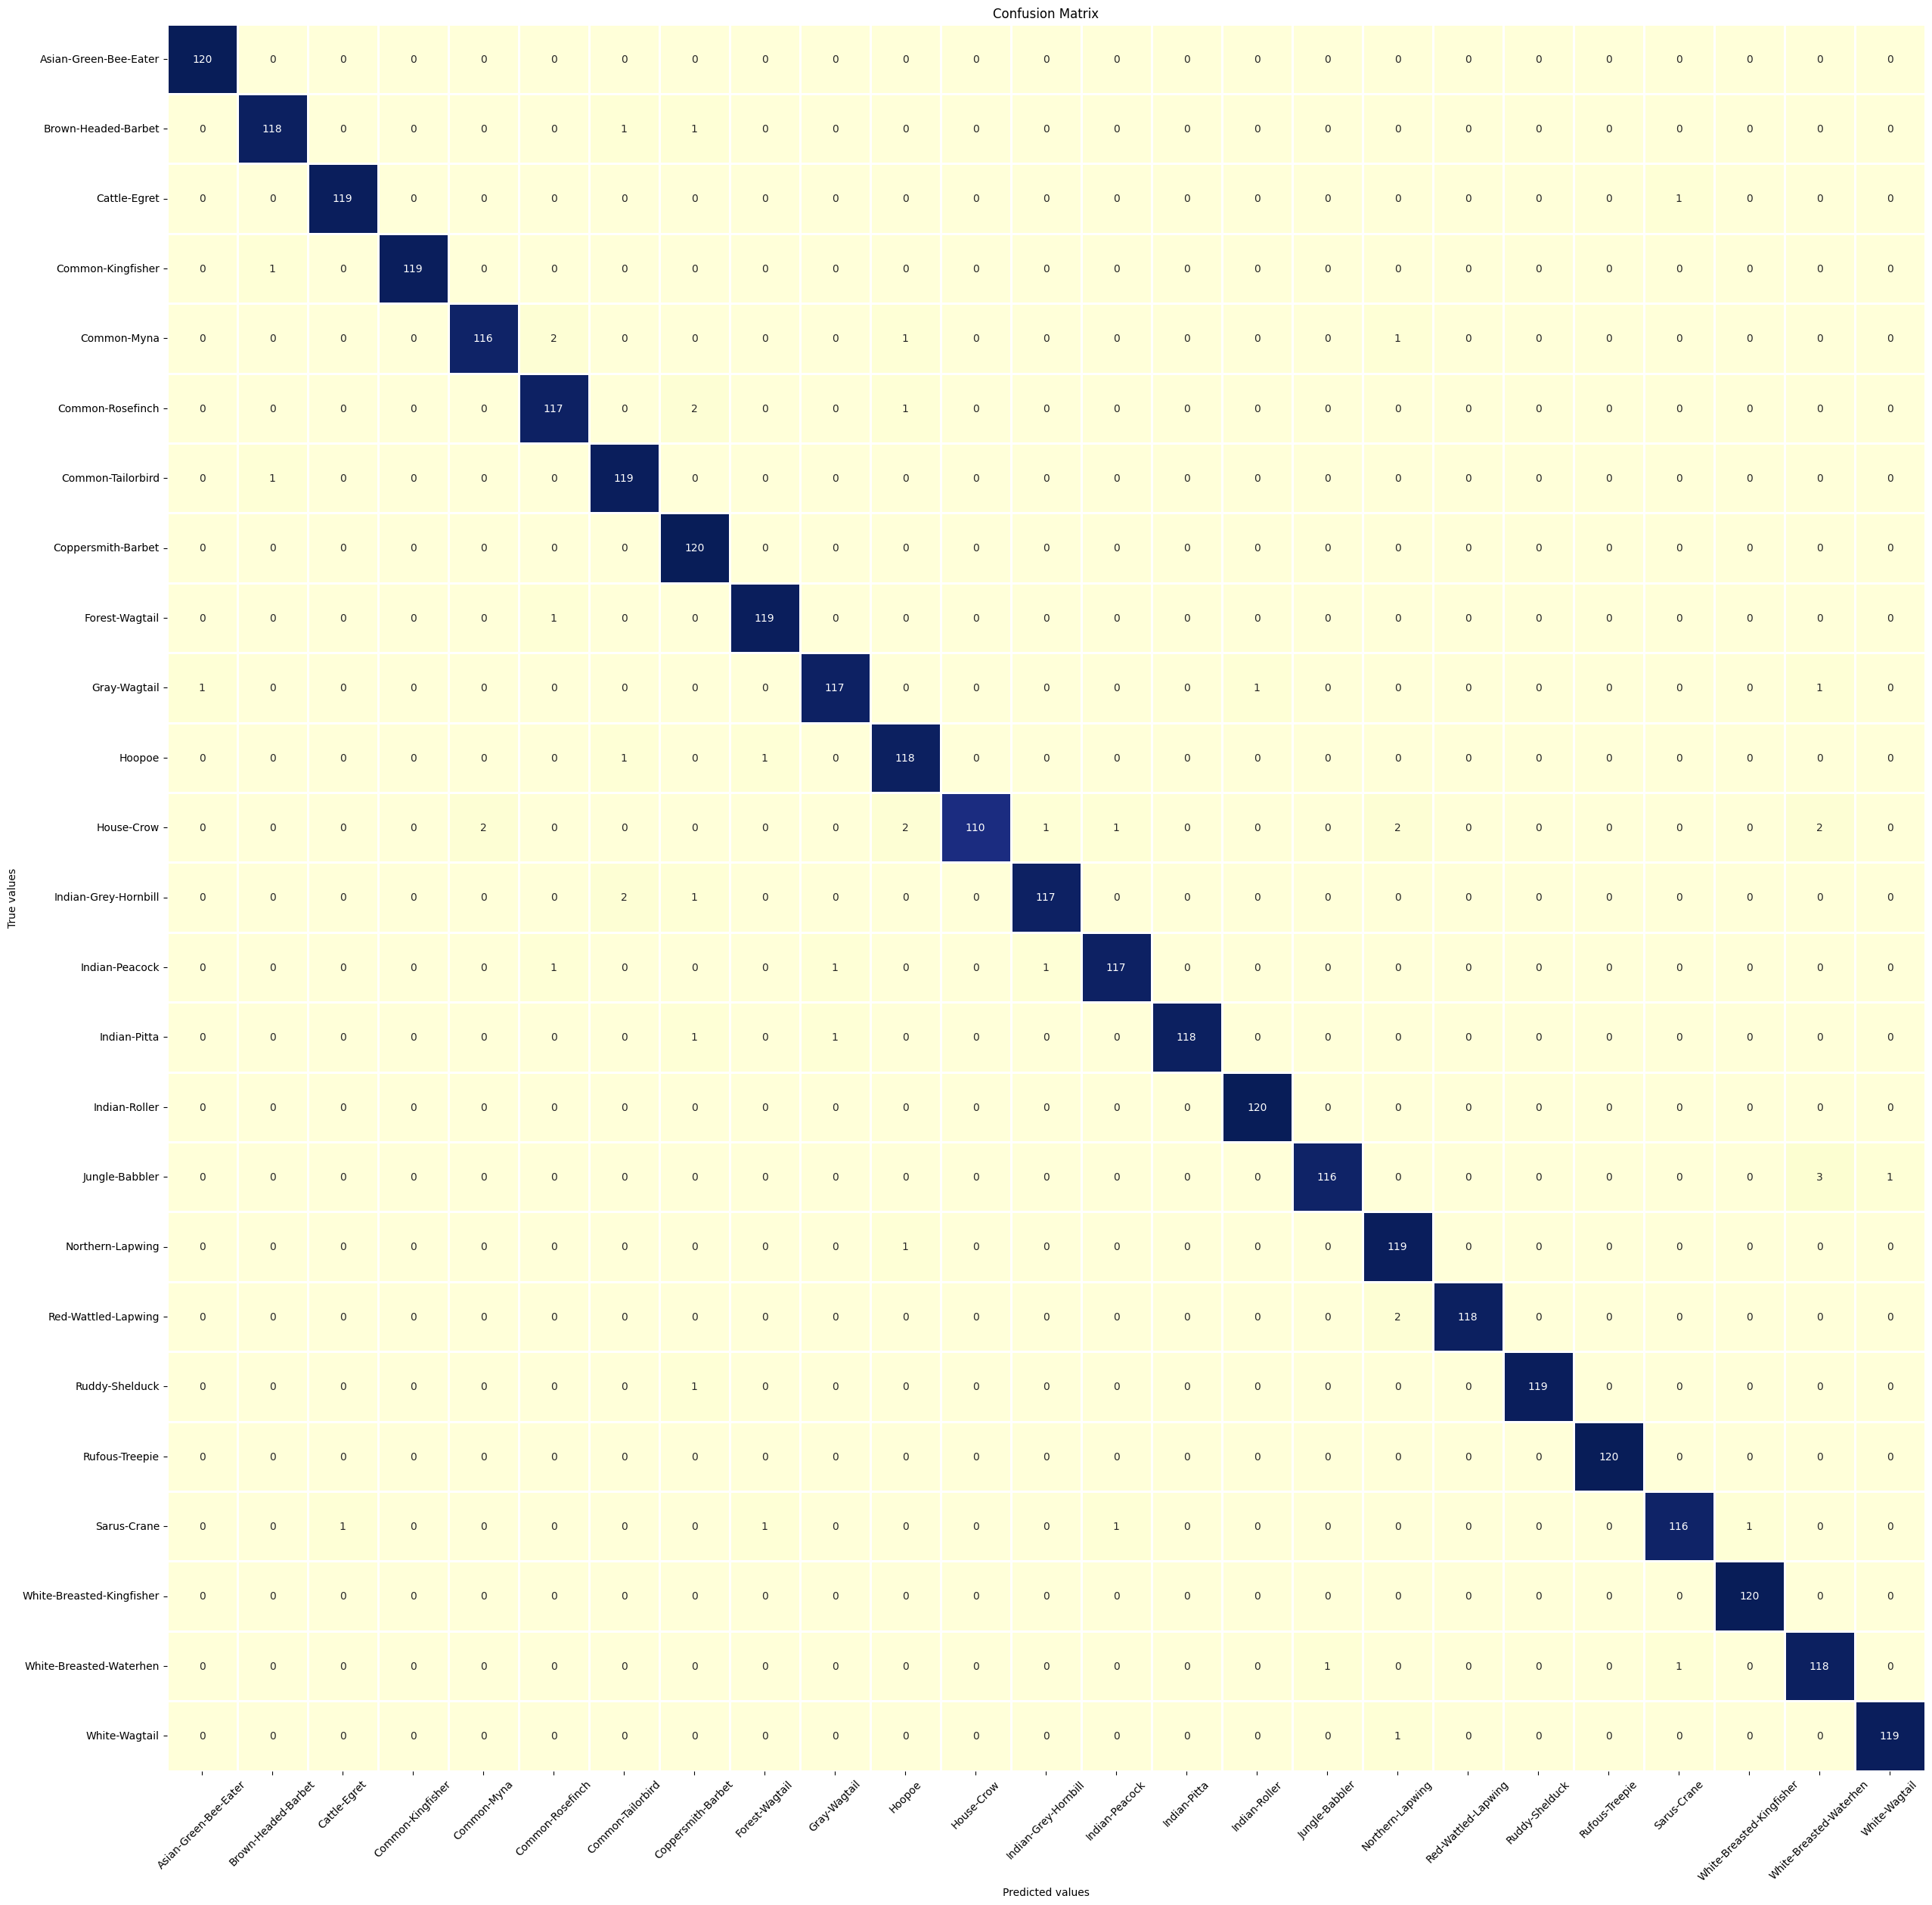

In [35]:
evaluate(model)

In [36]:
# Convert model to tf
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path(export_dir + 'birdies_fine_tuned.tflite')
tflite_model_file.write_bytes(tflite_model)

44361212